In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

## vid 14 0 bar plot example

## Read data

In [3]:
views = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=True, index_col='date')

In [4]:
views

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [5]:
views.value.isnull().sum()  # no NaNs is present

0

In [6]:
views.median()

value    57197.5
dtype: float64

In [7]:
views.value.quantile(0.5)

57197.5

In [8]:
views.value.mean().round(1)

67220.7

In [9]:
q_975 = views.value.quantile(0.975)
q_975

177613.075

In [10]:
q_025 = views.value.quantile(0.025)
q_025

17876.4

In [11]:
filt_outstanding = (views.value <= q_975) & (views.value >= q_025)

In [12]:
views_cleaned = views.loc[filt_outstanding, :].copy()
views_cleaned

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


## draw_line_plot


In [13]:
def draw_line_plot():
    # Draw line plot

    fig = plt.figure()
    
    # plot title
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    # axis labels
    plt.xlabel('Date')
    plt.ylabel('Page Views')

    # data
    x = views_cleaned.index
    y = views_cleaned.value

    plt.plot(x, y)
    # plt.show()
    # plt.savefig('line_plot.png')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

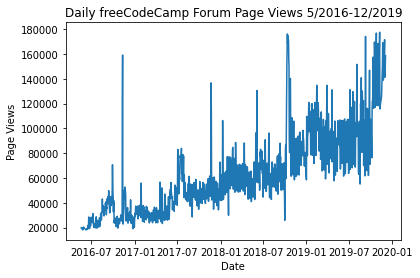

In [14]:
fi = draw_line_plot()

In [15]:
fi?

In [16]:
fi.axes?

In [17]:
len(fi.axes)

1

In [18]:
fi.axes[0]

<AxesSubplot:title={'center':'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'}, xlabel='Date', ylabel='Page Views'>

In [19]:
fi.axes[0].get_title()

'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'

## draw_bar_plot

In [ ]:
# show average daily page views for each month grouped by year
# legend should show month labels and have a title of "Months"
# On the chart, the label on the x axis should be "Years"
# and the label on the y axis should be "Average Page Views".

In [ ]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = views_cleaned.copy()

    # Draw bar plot

#     plt.title()
    plt.legend()
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    
    
    




    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

### Copy dataframe

In [20]:
vc = views_cleaned.copy()

In [21]:
vc.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


### Add year 

In [22]:
vc['year'] = vc.index.year

In [23]:
vc.year.value_counts().sort_index()

2016    205
2017    365
2018    362
2019    306
Name: year, dtype: int64

### Add month name

In [24]:
vc['month'] = vc.index.month_name()

In [25]:
vc.month.value_counts(normalize=True).mul(100).round(1)

August       9.9
September    9.7
July         9.7
October      9.0
June         8.6
November     8.4
May          7.9
December     7.7
January      7.5
March        7.5
April        7.3
February     6.8
Name: month, dtype: float64

In [26]:
vc.head()

,value,year,month
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May


### Add month index

In [27]:
vc['month_index'] = vc.index.month

In [28]:
vc.head()

,value,year,month,month_index
date,,,,
2016-05-19,19736,2016,May,5
2016-05-26,18060,2016,May,5
2016-05-27,19997,2016,May,5
2016-05-28,19044,2016,May,5
2016-05-29,20325,2016,May,5


In [29]:
vc.dtypes

value           int64
year            int64
month          object
month_index     int64
dtype: object

### get sorted months

In [32]:
month_gr = vc.groupby('month')

In [33]:
months_indexes = month_gr.nth(0)
months_indexes

,value,year,month_index
month,,,
April,23762,2017,4
August,20947,2016,8
December,32666,2016,12
February,30124,2017,2
January,26185,2017,1
July,28372,2016,7
June,18335,2016,6
March,33258,2017,3
May,19736,2016,5


In [46]:
months_indexes['combo'] = tuple(zip(months_indexes.index, months_indexes.month_index))

In [35]:
months_indexes

,value,year,month_index,combo
month,,,,
April,23762,2017,4,"(April, 4)"
August,20947,2016,8,"(August, 8)"
December,32666,2016,12,"(December, 12)"
February,30124,2017,2,"(February, 2)"
January,26185,2017,1,"(January, 1)"
July,28372,2016,7,"(July, 7)"
June,18335,2016,6,"(June, 6)"
March,33258,2017,3,"(March, 3)"
May,19736,2016,5,"(May, 5)"


In [36]:
month_tuples = list(months_indexes.combo)
# list(month_tuples)
# month_tuples
month_tuples

[('April', 4),
 ('August', 8),
 ('December', 12),
 ('February', 2),
 ('January', 1),
 ('July', 7),
 ('June', 6),
 ('March', 3),
 ('May', 5),
 ('November', 11),
 ('October', 10),
 ('September', 9)]

# todo: define month as categorical data; Specify logical ordering of the category ---- ordered categories

In [37]:
months = vc.month.unique()
months

array(['May', 'June', 'July', 'August', 'September', 'October',
       'November', 'December', 'January', 'February', 'March', 'April'],
      dtype=object)

In [38]:
# todoooo: months_ordered = sorted(months, key=len)
# months_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_ordered = sorted(month_tuples, key=lambda x: x[1])
months_ordered = [month for month, index in months_ordered]
months_ordered

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [39]:
month_type = pd.api.types.CategoricalDtype(categories=months_ordered, ordered=True)

In [40]:
vc['month'] = vc.month.astype(month_type)

In [41]:
vc.dtypes

value             int64
year              int64
month          category
month_index       int64
dtype: object

## data for bar plot

In [53]:
vc

,value,year,month,month_index
date,,,,
2016-05-19,19736,2016,May,5
2016-05-26,18060,2016,May,5
2016-05-27,19997,2016,May,5
2016-05-28,19044,2016,May,5
2016-05-29,20325,2016,May,5
...,...,...,...,...
2019-11-24,138875,2019,November,11
2019-11-29,171584,2019,November,11
2019-11-30,141161,2019,November,11


In [54]:
vc.drop(columns='month_index', inplace=True)

In [55]:
vcg2 = vc.groupby(['year', 'month'])

In [56]:
vcg2.mean().sort_index().head(10)

value
year month                  
2016 January             NaN
     February            NaN
     March               NaN
     April               NaN
     May        19432.400000
     June       21875.105263
     July       24109.678571
     August     31049.193548
     September  41476.866667
     October    27398.322581

<AxesSubplot:xlabel='year,month'>

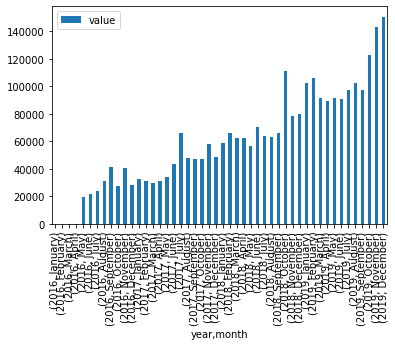

In [57]:
vcg2.mean().sort_index().plot(kind='bar')

## rotate data to get year as index and months list as columns